In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_labels_data [5 0 4 1 9 2 1 3]


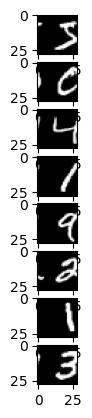

In [4]:
import sys
def load_idx_file(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number
        magic_number = int.from_bytes(f.read(4), byteorder='big')

        # Read the number of items (rows)
        num_items = int.from_bytes(f.read(4), byteorder='big')

        # Read the data (doesn't read the whole file. It passes 4+4 bytes of data)
        data = np.frombuffer(f.read(), dtype=np.uint8)

    return data


path = sys.path[0]

trian_labels_path = path + '/mnist database/train-labels.idx1-ubyte'
trian_images_path = path + '/mnist database/train-images.idx3-ubyte'
test_labels_path = path + 'mnist database/t10k-labels.idx1-ubyte'
test_images_path = path + '/mnist database/t10k-images.idx3-ubyte'

train_labels_data = load_idx_file(trian_labels_path)

train_images_data = load_idx_file(trian_images_path)


image_dims = 28 * 28

# Remove the remainder from the one dim ndarray
additional_photo_pixels_to_be_removed = 8
train_images_data = train_images_data[:-additional_photo_pixels_to_be_removed]

images_count = train_images_data.shape[0] // image_dims

train_images_data = train_images_data.reshape((images_count, 28, 28))

print(train_images_data.shape)
print(train_labels_data.shape)

# Testing if the deleted data reordered the rest of the data:
print(f"train_labels_data {train_labels_data[:8]}")

fig, axes = plt.subplots(8,1)
for i in range(0,8):
    axes[i].imshow(train_images_data[i], cmap="gray", )

